In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 🫀 Heart Disease Dataset – Features

| Feature | Full Form | Description |
|--------|-----------|-------------|
| age | Age | Age of patient (years) |
| sex | Sex | 1 = male, 0 = female |
| cp | Chest Pain | 0–3: typical, atypical, non-anginal, asymptomatic |
| trestbps | Resting BP | Resting blood pressure (mm Hg) |
| chol | Serum Cholesterol | Cholesterol level (mg/dl) |
| fbs | Fasting Blood Sugar | >120 mg/dl = 1, else 0 |
| restecg | Resting ECG | 0 = normal, 1 = ST-T abnormality, 2 = LVH |
| thalach | Max Heart Rate | Maximum heart rate achieved |
| exang | Exercise Angina | 1 = yes, 0 = no |
| oldpeak | ST Depression | Exercise-induced ST depression |
| slope | ST Slope | 0 = up, 1 = flat, 2 = down |
| ca | Colored Vessels | Major vessels (0–3) |
| thal | Thalassemia | 3 = normal, 6 = fixed, 7 = reversible |



# Preprocessing:

In [3]:
print(f"shape of data :{df.shape}")
print(f"dataset info :{df.info}")
print(f"Summary stastics: {df.describe(include='all')}")
print(f"missing valuse :{df.isnull().sum()}")
print(f"data types \n{df.dtypes}")


shape of data :(1025, 14)
dataset info :<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

   

## featurescaling

In [4]:
# feature scaling
df['target'] = 1 - df['target'] #revering the lable to fix the probability

scaledDf = df.copy()
# initialize scaler
standard_scaler = StandardScaler()
# Scale only continuous features
scaledDf[['age','trestbps','chol','thalach','oldpeak']] = \
    standard_scaler.fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])
# check
scaledDf.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,1
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,1
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,1
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,1
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,1


## defining x and y

In [5]:
# defining features:
features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',]

X=np.array(scaledDf[features])
y=np.array(scaledDf['target'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# ANN

In [6]:
# defining model:
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# training model:
print(f"Model summary:\n{model.summary()}")
model.fit(X_train,y_train,epochs=20,verbose=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

Model summary:
None
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5695 - loss: 0.6780
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7793 - loss: 0.5318
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.4440 
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3903 
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.3595 
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3445 
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3344 
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3271 
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8720 - loss: 0.3198 
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3104 
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.3051 
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [8]:
# predict
y_pred = model.predict(X_test) # 0 to 1
y_pred_classes = (y_pred > 0.5).astype(int)
print(y_pred_classes.sum())
print(y_test.sum())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
89
102


# model evaluation:

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Evaluation from actual vs predicted:
# evaluation
print("accuarcy=",accuracy_score(y_test,y_pred_classes))
print("precision=",precision_score(y_test,y_pred_classes))
print("recall=",recall_score(y_test,y_pred_classes))
print("F1 score=",f1_score(y_test,y_pred_classes))


accuarcy= 0.8195121951219512
precision= 0.8651685393258427
recall= 0.7549019607843137
F1 score= 0.806282722513089


[[91 12]
 [25 77]]


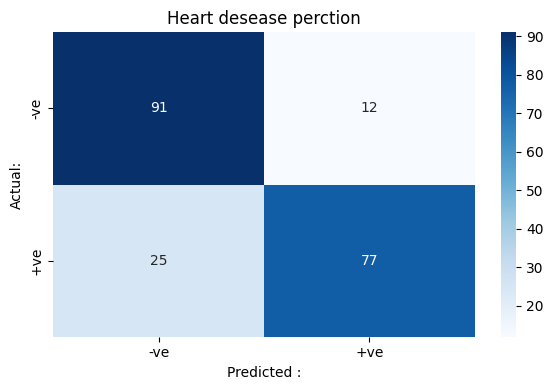

In [10]:
from sklearn.metrics import confusion_matrix
# confusion metrics:
confu_matrix=confusion_matrix(y_test,y_pred_classes) # actual,prediction
print(confu_matrix)
# ploting 
plt.figure(figsize=(6,4))
sns.heatmap(confu_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["-ve","+ve"],yticklabels=["-ve","+ve"])
plt.xlabel("Predicted :")
plt.ylabel("Actual:")
plt.title("Heart desease perction")
plt.tight_layout()
plt.show()

# User prediction:

| #  | Feature (Short Name) | Full Form                                      | Type        | Values / Typical Range                                                          | Description / Medical Insight                                                                                    |
| -- | -------------------- | ---------------------------------------------- | ----------- | ------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| 1  | Age                  | Age of the Patient                             | Continuous  | 29–77 years                                                                     | Patient’s age. Heart disease risk increases with age.                                                            |
| 2  | Sex                  | Biological Sex                                 | Categorical | 1 = Male, 0 = Female                                                            | Male sex is generally associated with higher heart disease risk.                                                 |
| 3  | CP                   | Chest Pain Type                                | Categorical | 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic | Type of chest pain experienced; helps assess likelihood of coronary artery disease.                              |
| 4  | Trestbps             | Resting Blood Pressure                         | Continuous  | 90–200 mm Hg                                                                    | Blood pressure at rest. High values increase cardiovascular risk.                                                |
| 5  | Chol                 | Serum Cholesterol                              | Continuous  | 126–564 mg/dl                                                                   | Total cholesterol level. High cholesterol can lead to atherosclerosis.                                           |
| 6  | FBS                  | Fasting Blood Sugar                            | Categorical | 1 if >120 mg/dl, 0 otherwise                                                    | Indicates diabetes or impaired fasting glucose, a risk factor for heart disease.                                 |
| 7  | RestECG              | Resting Electrocardiographic Result            | Categorical | 0 = Normal, 1 = ST-T Abnormality, 2 = Left Ventricular Hypertrophy              | Shows structural or electrical abnormalities of the heart at rest.                                               |
| 8  | Thalach              | Maximum Heart Rate Achieved                    | Continuous  | 71–202 bpm                                                                      | Maximum heart rate achieved during exercise test; lower max HR may indicate heart problems.                      |
| 9  | Exang                | Exercise Induced Angina                        | Categorical | 1 = Yes, 0 = No                                                                 | Indicates if chest pain occurs during physical exertion.                                                         |
| 10 | Oldpeak              | ST Depression Induced by Exercise              | Continuous  | 0–6.2                                                                           | Depression of ST segment during exercise; higher values indicate more ischemia.                                  |
| 11 | Slope                | Slope of Peak Exercise ST Segment              | Categorical | 0 = Upsloping, 1 = Flat, 2 = Downsloping                                        | Shape of the ST segment during peak exercise; downsloping indicates higher risk.                                 |
| 12 | CA                   | Number of Major Vessels Colored by Fluoroscopy | Integer     | 0–3                                                                             | Number of major coronary vessels showing contrast uptake; more vessels affected = higher disease severity.       |
| 13 | Thal                 | Thalassemia / Heart Tissue Defect Type         | Categorical | 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect                             | Indicates functional defects in heart tissue; fixed = permanent damage, reversible = ischemic but viable tissue. |


In [11]:
# -------------------------------
# No-disease case user input
# -------------------------------

user_input = [
    32,     # age (young)
    1,      # sex (1 = male, 0 = female)
    1,      # cp (atypical angina – mild)
    118,    # trestbps (normal blood pressure)
    170,    # chol (healthy cholesterol)
    0,      # fbs (normal fasting blood sugar)
    0,      # restecg (normal ECG)
    182,    # thalach (good max heart rate)
    0,      # exang (no exercise angina)
    0.0,    # oldpeak (no ST depression)
    0,      # slope (upsloping – normal)
    0,      # ca (no blocked vessels)
    3       # thal (normal)
]

user_array = np.array(user_input).reshape(1, -1)

# Scale ONLY numeric features (same scaler used in training)
numeric_idx = [0,3,4,7,9]  # age, trestbps, chol, thalach, oldpeak
user_array[:, numeric_idx] = standard_scaler.transform(user_array[:, numeric_idx])

pred_prob = model.predict(user_array)[0][0]
pred_class = int(pred_prob > 0.5)

print(f"Predicted probability of heart disease: {pred_prob:.2f}")
print("Predicted class:", "Disease 💔" if pred_class==1 else "No Disease ❤️")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted probability of heart disease: 0.11
Predicted class: No Disease ❤️


c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# -------------------------------
# Disease case user input
# -------------------------------

user_input = [
    65,     # age (older age → higher risk)
    1,      # sex (1 = male)
    3,      # cp (3 = asymptomatic chest pain)
    160,    # trestbps (high blood pressure)
    300,    # chol (very high cholesterol)
    1,      # fbs (>120 mg/dl, diabetic)
    2,      # restecg (left ventricular hypertrophy)
    110,    # thalach (low max heart rate)
    1,      # exang (exercise induced angina)
    3.5,    # oldpeak (high ST depression)
    2,      # slope (downsloping – worst)
    2,      # ca (2 major vessels blocked)
    6       # thal (fixed defect – permanent damage)
]

user_array = np.array(user_input).reshape(1, -1)

# Scale ONLY numeric features (same scaler used in training)
numeric_idx = [0, 3, 4, 7, 9]  # age, trestbps, chol, thalach, oldpeak
user_array[:, numeric_idx] = standard_scaler.transform(user_array[:, numeric_idx])

# Predict
pred_prob = model.predict(user_array)[0][0]
pred_class = int(pred_prob > 0.5)

print(f"Predicted probability of heart disease: {pred_prob:.2f}")
print("Predicted class:", "Disease 💔" if pred_class==1 else "No Disease ❤️")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted probability of heart disease: 1.00
Predicted class: Disease 💔


In [13]:
import numpy as np
user_input = []
# 1️⃣ Age
user_input.append(float(input("Enter Age (years, typical: 29-77): ")))

# 2️⃣ Sex
user_input.append(int(input("Enter Sex (1 = Male, 0 = Female): ")))

# 3️⃣ Chest Pain Type (cp)
user_input.append(int(input(
    "Enter Chest Pain Type (0 = Typical angina, 1 = Atypical angina, "
    "2 = Non-anginal pain, 3 = Asymptomatic): "
)))

# 4️⃣ Resting Blood Pressure (trestbps)
user_input.append(float(input("Enter Resting Blood Pressure (mm Hg, typical: 90-200): ")))

# 5️⃣ Serum Cholesterol (chol)
user_input.append(float(input("Enter Serum Cholesterol (mg/dl, typical: 126-564): ")))

# 6️⃣ Fasting Blood Sugar (fbs)
user_input.append(int(input("Enter Fasting Blood Sugar (>120 mg/dl = 1, else 0): ")))

# 7️⃣ Resting ECG (restecg)
user_input.append(int(input(
    "Enter Resting Electrocardiographic Result (0 = normal, 1 = ST-T abnormality, "
    "2 = left ventricular hypertrophy): "
)))

# 8️⃣ Maximum Heart Rate Achieved (thalach)
user_input.append(float(input("Enter Maximum Heart Rate Achieved (typical: 71-202 bpm): ")))

# 9️⃣ Exercise Induced Angina (exang)
user_input.append(int(input("Enter Exercise Induced Angina (1 = Yes, 0 = No): ")))

# 1️⃣0️⃣ ST Depression Induced by Exercise (oldpeak)
user_input.append(float(input("Enter ST Depression (oldpeak, typical: 0-6.2): ")))

# 1️⃣1️⃣ Slope of Peak Exercise ST Segment (slope)
user_input.append(int(input(
    "Enter Slope of Peak Exercise ST Segment (0 = Upsloping, 1 = Flat, 2 = Downsloping): "
)))

# 1️⃣2️⃣ Number of Major Vessels Colored by Fluoroscopy (ca)
user_input.append(int(input("Enter Number of Major Vessels (0-3): ")))

# 1️⃣3️⃣ Thalassemia (thal)
user_input.append(int(input(
    "Enter Thalassemia Type (3 = Normal, 6 = Fixed defect, 7 = Reversible defect): "
)))

# Convert to 2D array
user_array = np.array(user_input).reshape(1, -1)  # shape (1,13)

# ✅ Scale only numeric features
numeric_idx = [0, 3, 4, 7, 9]  # indices of numeric features

# Apply scaler on numeric columns
user_array[:, numeric_idx] = standard_scaler.transform(user_array[:, numeric_idx])

# Now user_array is ready to feed into the ANN
pred_prob = model.predict(user_array)[0][0]
pred_class = (pred_prob > 0.5).astype(int)

print(f"Predicted probability of heart disease: {pred_prob:.2f}")
print(f"Predicted class: {'Disease 💔' if pred_class==1 else 'No Disease ❤️'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted probability of heart disease: 0.28
Predicted class: No Disease ❤️


c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
